In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Credit Approval Data Set
data = pd.read_csv('/Users/AdMiN/Desktop/Data Science Projects/Credit Approval/credit-approval.csv')

In [2]:
#View Data
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [3]:
#Check shape of data
data.shape

(690, 16)

We have 690 observations and 16 Features

In [4]:
#Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1       678 non-null object
A2       678 non-null float64
A3       690 non-null float64
A4       684 non-null object
A5       684 non-null object
A6       681 non-null object
A7       681 non-null object
A8       690 non-null float64
A9       690 non-null object
A10      690 non-null object
A11      690 non-null int64
A12      690 non-null object
A13      690 non-null object
A14      677 non-null float64
A15      690 non-null int64
class    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [5]:
#Define Numerical Data
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.dtypes

A2     float64
A3     float64
A8     float64
A11      int64
A14    float64
A15      int64
dtype: object

We have 6 numerical features and 10 categorical features

In [6]:
#Check data for missing value
data.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

In [25]:
#Check %Missing value we can discard from our data set or not?
#If more than 5% we cannot, have to impute
round(data.isnull().sum()/data.shape[0]*100,2)

A1       1.74
A2       1.74
A3       0.00
A4       0.87
A5       0.87
A8       0.00
A9       0.00
A10      0.00
A11      0.00
A12      0.00
A13      0.00
A14      1.88
A15      0.00
class    0.00
dtype: float64

The maximum missing value only 2% so they do not affect any result much. We can drop them

In [7]:
#Check unique value in Categorical Feature
#A1 Feature
data['A1'].unique()

array(['b', 'a', nan], dtype=object)

In [8]:
#A4 Feature
data['A4'].unique()

array(['u', 'y', nan, 'l'], dtype=object)

In [9]:
#A5 Feature
data['A5'].unique()

array(['g', 'p', nan, 'gg'], dtype=object)

In [10]:
#A6 Feature
data['A6'].unique()

array(['w', 'q', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j', nan], dtype=object)

In [11]:
#A7 Feature
data['A7'].unique()

array(['v', 'h', 'bb', 'ff', 'j', 'z', nan, 'o', 'dd', 'n'], dtype=object)

In [13]:
#A9 Feature
data['A9'].unique()

array(['t', 'f'], dtype=object)

In [14]:
#A10 Feature
data['A10'].unique()

array(['t', 'f'], dtype=object)

In [15]:
#A12 Feature
data['A12'].unique()

array(['f', 't'], dtype=object)

In [32]:
#A13 Feature
data['A13'].unique()

array(['g', 's', 'p'], dtype=object)

In [17]:
#Class (Target Variable)
data['class'].unique()

array(['+', '-'], dtype=object)

Conclusion for Unique values
from the data we will see A9, A10, A12 contain True/False data represent by 't' and 'f'.
In case of A6 and A7 may be information of the client, not neccesary for analysis due to too many variable so we gonna drop both feature before analysis. For A1,A4 A5 still need for analysis, It looks like separaet into few group clearly

In [2]:
#Drop A6 and A7 Features
data = data.drop(['A6', 'A7'], axis=1)
data.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+


In [3]:
#Replace + and - to 0 and 1 for not approve and approve
data = data.replace({'+':1, '-': 0})
data.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,1


In [29]:
#Statistic Summary
data.describe()

,A2,A3,A8,A11,A14,A15,class
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,31.578349,4.830558,2.241690,2.498471,180.084098,1012.730887,0.452599
std,11.981789,5.023295,3.369197,4.965655,168.315719,5249.320660,0.498129
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,70.750000,0.000000,0.000000
50%,28.460000,2.855000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,38.250000,7.437500,2.615000,3.000000,271.000000,399.000000,1.000000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


from statistic summary it looks like we have outlier on feature A3, A8, A11, A14, and A15 we will check from EDA later with boxplot due to Max values are deviate from 75% Quantile

In [4]:
#Drop missin value in our data set
data = data.dropna()

# Exploratory Data Analysis

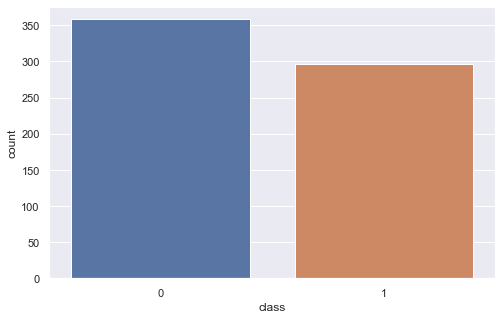

In [42]:
#Univariant Analysis for class
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=data)

There is no problem about imbalance data set, you will see from the numbers of approve and no approve not different too much

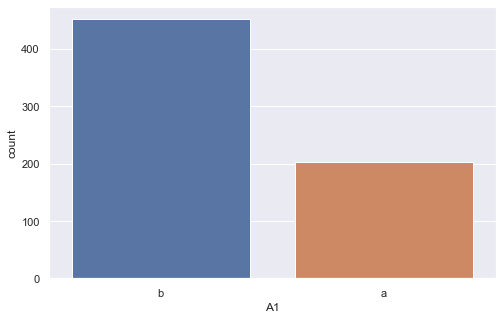

In [43]:
#Univariant Analysis for A1 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A1', data=data)

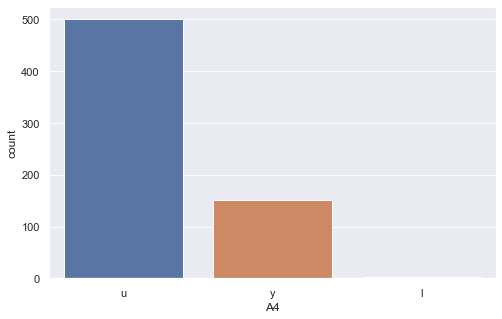

In [44]:
#Univariant Analysis for A4 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A4', data=data)

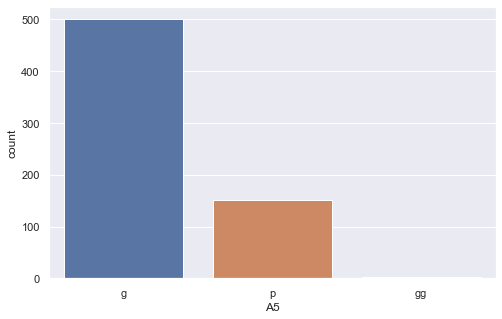

In [45]:
#Univariant Analysis for A5 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A5', data=data)

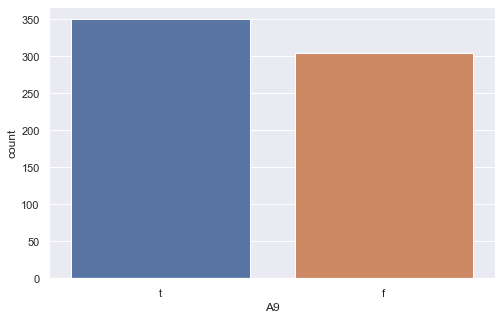

In [46]:
#Univariant Analysis for A9 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A9', data=data)

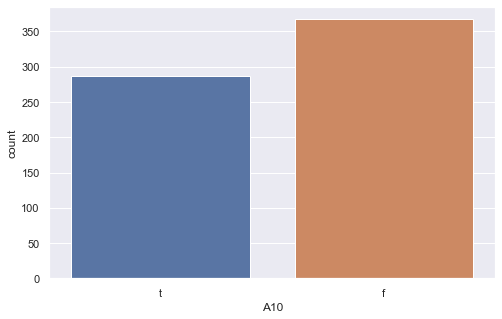

In [47]:
#Univariant Analysis for A10 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A10', data=data)

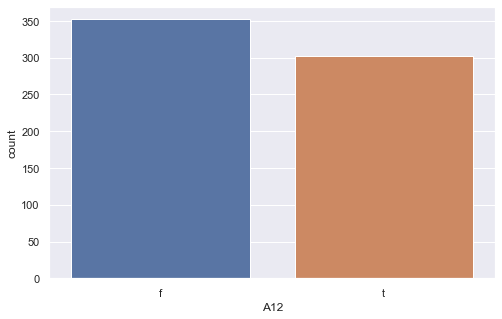

In [48]:
#Univariant Analysis for A12 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A12', data=data)

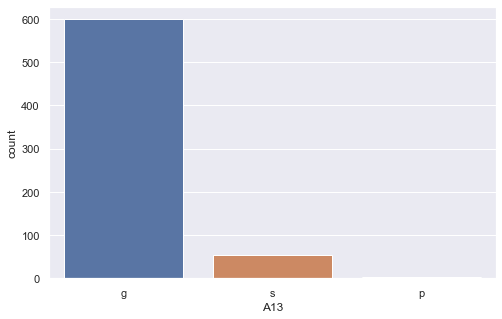

In [49]:
#Univariant Analysis for A13 Feature
plt.figure(figsize=(8,5))
sns.countplot(x='A13', data=data)

Text(0.5, 0, 'A2 Value')

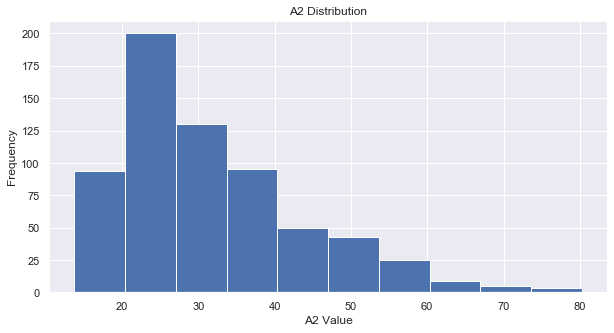

In [51]:
#A2 Distirubtion
data['A2'].plot.hist(figsize=(10,5))
plt.title('A2 Distribution')
plt.xlabel('A2 Value')

Text(0.5, 0, 'A3 Value')

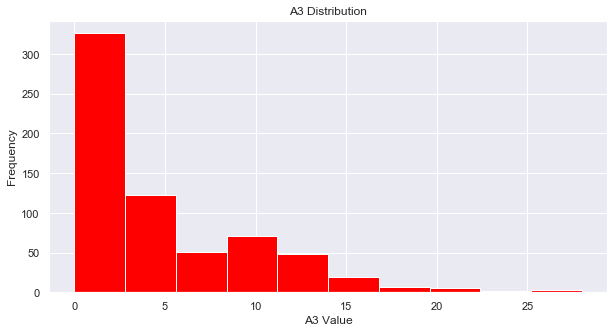

In [54]:
#A3 Distirubtion
data['A3'].plot.hist(figsize=(10,5), color='red')
plt.title('A3 Distribution')
plt.xlabel('A3 Value')

Text(0.5, 0, 'A8 Value')

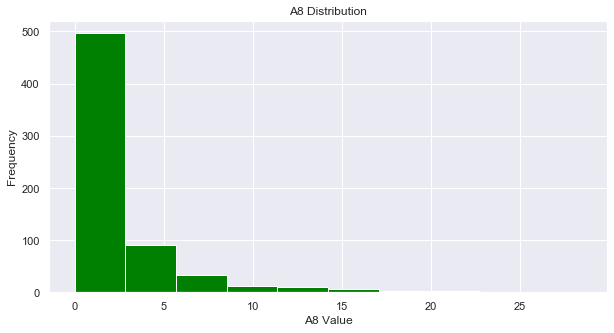

In [55]:
#A8 Distirubtion
data['A8'].plot.hist(figsize=(10,5), color='green')
plt.title('A8 Distribution')
plt.xlabel('A8 Value')

Text(0.5, 0, 'A11 Value')

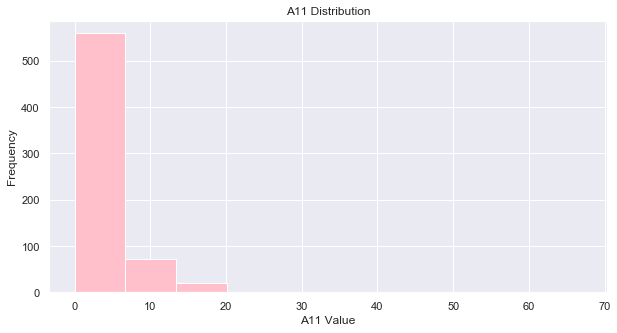

In [59]:
#A11 Distirubtion
data['A11'].plot.hist(figsize=(10,5), color='pink')
plt.title('A11 Distribution')
plt.xlabel('A11 Value')

Text(0.5, 0, 'A14 Value')

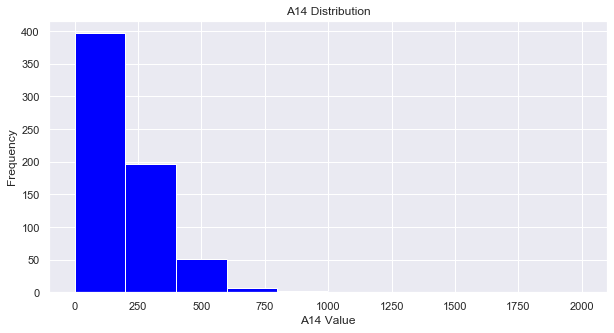

In [61]:
#A14 Distirubtion
data['A14'].plot.hist(figsize=(10,5), color='blue')
plt.title('A14 Distribution')
plt.xlabel('A14 Value')

Text(0.5, 0, 'A15 Value')

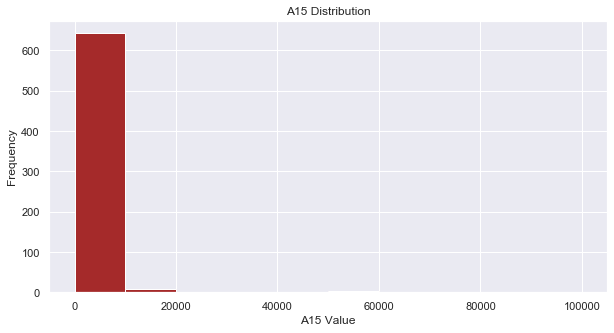

In [63]:
#A15 Distirubtion
data['A15'].plot.hist(figsize=(10,5), color='brown')
plt.title('A15 Distribution')
plt.xlabel('A15 Value')

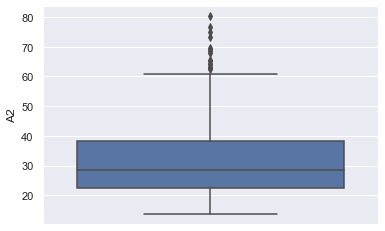

In [65]:
#Check outlier with Boxplot A2
sns.boxplot(y='A2', data=data)

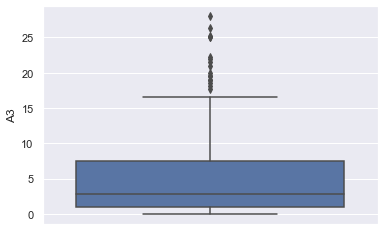

In [66]:
#Check outlier with Boxplot A3
sns.boxplot(y='A3', data=data)

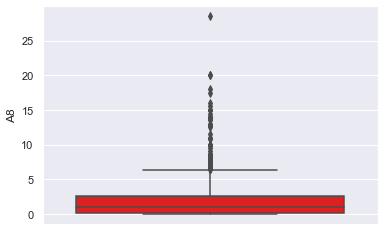

In [67]:
#Check outlier with Boxplot A8
sns.boxplot(y='A8', data=data, color='red')

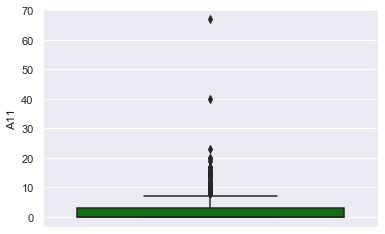

In [68]:
#Check outlier with Boxplot A11
sns.boxplot(y='A11', data=data, color='green')

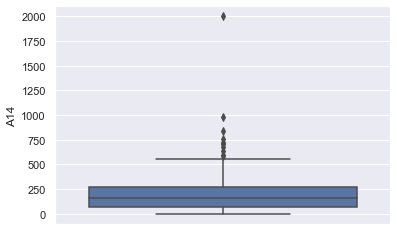

In [69]:
#Check outlier with Boxplot A14
sns.boxplot(y='A14', data=data)

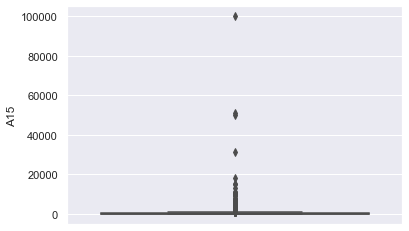

In [70]:
#Check outlier with Boxplot A15
sns.boxplot(y='A15', data=data)

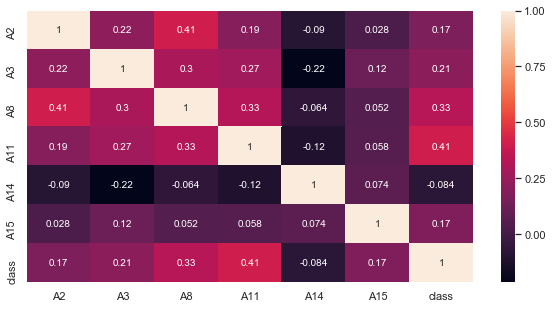

In [73]:
#See Correlation Between Numerical Features
data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

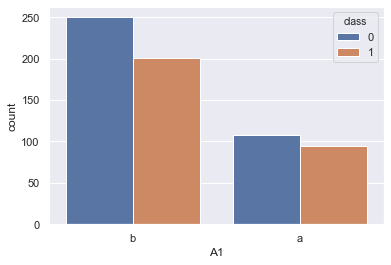

In [74]:
#Bivariant Analysis with Target Variable
#A1 and Class
sns.countplot(x='A1', hue='class', data=data)

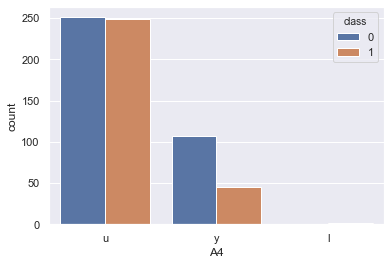

In [75]:
#A4 and Class
sns.countplot(x='A4', hue='class', data=data)

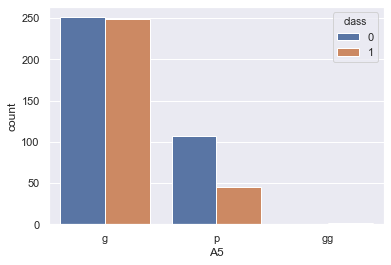

In [76]:
#A5 and Class
sns.countplot(x='A5', hue='class', data=data)

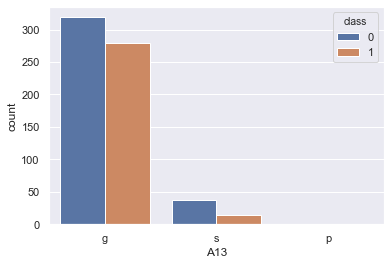

In [77]:
#A13 and Class
sns.countplot(x='A13', hue='class', data=data)

# Modeling 

Let's say we try to use numeric feature to classify data with Kmeans for the 1st Experiment and 2nd Experiment will include all features to compare %Performance

Experiment#1

In [105]:
#Import Kmeans Library and Standardize library
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Define Feature Variables and Target Variable
X = np.array(data[['A2','A3','A8','A11','A14','A15']].astype(float)) #Feature Variables
y = np.array(data['class']) #Target Variables

In [106]:
#Scaler Data 
scale = MinMaxScaler()
X_scale = scale.fit_transform(X)

In [107]:
#Build KMeans Model
kmeans = KMeans(n_clusters = 2)

#Fit Model to data set
kmeans.fit(X_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [108]:
#Prediction Target Variable
prediction = kmeans.labels_
print(prediction)

[1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 

In [109]:
#Check label prediction from actual target
correct=0
for i in range(len(X)):
    if prediction[0] ==y[i]:
        correct += 1
print('K-Means Performance:',round(correct/len(X)*100,2),'%') 

K-Means Performance: 45.26 %


#Experiment#2

This Experiment we try to do with all features, so we have to encoding categorical feature to numerical

# Feature Engineering with Categorical Data

Feature Engineer with Non-ordinal data (A1,A4,A5,A9,A10,A12,A13) so we use dummy variable and drop 1 column 

In [5]:
#Import Kmeans Library and Standardize library
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [6]:
#Transform to dummy variable
A1_dummy = pd.get_dummies(data['A1'], drop_first=True)
A4_dummy = pd.get_dummies(data['A4'], drop_first=True)
A5_dummy = pd.get_dummies(data['A5'], drop_first=True)
A9_dummy = pd.get_dummies(data['A9'], drop_first=True)
A10_dummy = pd.get_dummies(data['A10'], drop_first=True)
A12_dummy = pd.get_dummies(data['A12'], drop_first=True)
A13_dummy = pd.get_dummies(data['A13'], drop_first=True)

#Combine dummy variable to data set
df = pd.concat([data,A1_dummy,A4_dummy,A5_dummy,A9_dummy,A10_dummy,A12_dummy,A13_dummy], axis=1)
df.head()

,A1,A2,A3,A4,A5,A8,A9,A10,A11,A12,...,b,u,y,gg,p,t,t,t,p,s
0,b,30.83,0.000,u,g,1.25,t,t,1,f,...,1,1,0,0,0,1,1,0,0,0
1,a,58.67,4.460,u,g,3.04,t,t,6,f,...,0,1,0,0,0,1,1,0,0,0
2,a,24.50,0.500,u,g,1.50,t,f,0,f,...,0,1,0,0,0,1,0,0,0,0
3,b,27.83,1.540,u,g,3.75,t,t,5,t,...,1,1,0,0,0,1,1,1,0,0
4,b,20.17,5.625,u,g,1.71,t,f,0,f,...,1,1,0,0,0,1,0,0,0,1


In [7]:
#Drop some feature that not necessary for prediction target variable
df = df.drop(['A1','A4','A5','A9','A10','A12','A13'], axis=1) 
df.head()

,A2,A3,A8,A11,A14,A15,class,b,u,y,gg,p,t,t,t,p,s
0,30.83,0.000,1.25,1,202.0,0,1,1,1,0,0,0,1,1,0,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,1,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,1,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5,100.0,3,1,1,1,0,0,0,1,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,1,1,1,0,0,0,1,0,0,0,1


In [8]:
#Define Feature Variables and Target Variable
X1 = np.array(df.drop('class', axis=1).astype(float)) #Feature Variables
y1 = np.array(df['class']) #Target Variables

In [9]:
#Scaler Data 
scale = MinMaxScaler()
X1_scale = scale.fit_transform(X1)

In [10]:
#Build KMeans Model
kmeans = KMeans(n_clusters = 2)

#Fit Model to data set
kmeans.fit(X1_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#Prediction Target Variable
prediction = kmeans.labels_
print(prediction)

[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 

In [14]:
#Check label prediction from actual target
correct=0
for i in range(len(X1)):
    if prediction[0] ==y1[i]:
        correct += 1
print('K-Means Performance:',round(correct/len(X1)*100,2),'%') 

K-Means Performance: 54.74 %


Text(0, 0.5, 'A8')

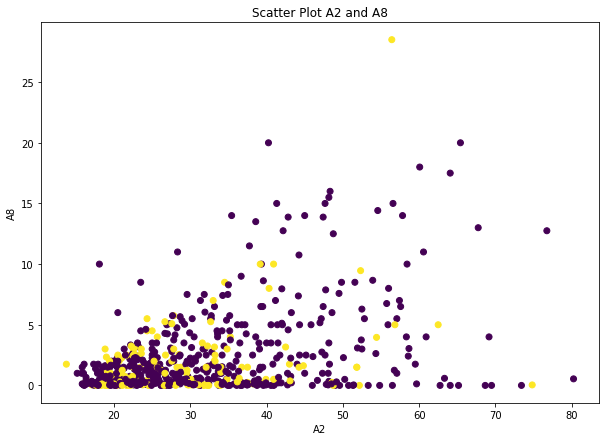

In [21]:
#Scatter Plot to see how they grouping
plt.figure(figsize=(10,7))
plt.scatter(df['A2'], df['A8'], c=kmeans.labels_)
plt.title('Scatter Plot A2 and A8')
plt.xlabel('A2')
plt.ylabel('A8')